In [17]:
import os
import matplotlib.pyplot as plt

# valeurs de Z1 et Z2
Z1 = True
Z2 = True

# création des listes pour stocker les coordonnées (NTtoD, Fscore)
#std
path = "C:\workspace2\Datasets\Chalearn\expOut\\"

def getFScoreAndNTtoDoFor(doSSG, useSG,wCTC=0.9,smooth=10):
    nttod_fscore_list = []
   # parcours des fichiers
    for x in range(0, 11):
        # construction du nom de fichier
        filename = f"vox4_cuDi3_wCTC{wCTC}_smooth{str(smooth)}_SSG{str(doSSG)}_wprior{x / 10.0:.1f}_useSG{str(useSG)}_split200/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt"
        # vérification si le fichier existe
        if os.path.exists(path+filename):
            # ouverture du fichier en mode lecture
            with open(path+filename, "r") as f:
                # parcours des lignes
                for line in f:
                    # recherche des scores Fscore et NTtoD
                    if "FScore:" in line:
                        vals = line.split()
                        fscore = float(vals[1])
                        stdFscore = float(vals[-1])
                    elif "NTtoD:" in line:
                        vals = line.split()
                        nttod = float(vals[1])
                        stdNTtoD = float(vals[-1])
                # ajout des coordonnées à la liste correspondante
                nttod_fscore_list.append((nttod, stdNTtoD,fscore, stdFscore))
        else:
            print(f"Le fichier {filename} n'existe pas.")
    return nttod_fscore_list



Le fichier vox4_cuDi3_wCTC0.9_smooth10_SSGFalse_wprior0.6_useSGTrue_split200/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
Le fichier vox4_cuDi3_wCTC0.9_smooth10_SSGFalse_wprior0.7_useSGTrue_split200/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
Le fichier vox4_cuDi3_wCTC0.9_smooth10_SSGTrue_wprior0.0_useSGTrue_split200/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
Le fichier vox4_cuDi3_wCTC0.9_smooth10_SSGTrue_wprior0.4_useSGTrue_split200/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
Le fichier vox4_cuDi3_wCTC0.9_smooth10_SSGTrue_wprior0.7_useSGTrue_split200/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
Le fichier vox4_cuDi3_wCTC1.0_smooth0_SSGTrue_wprior0.1_useSGFalse_split200/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_no

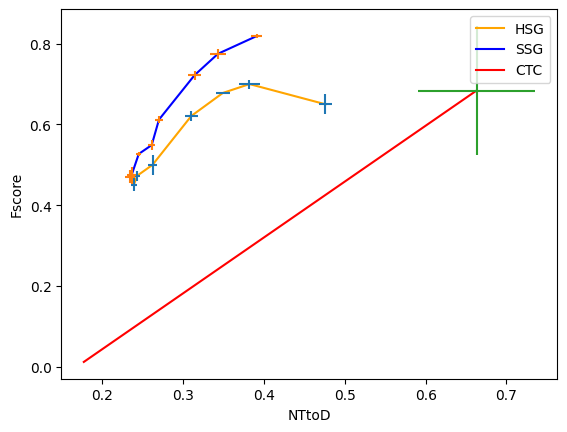

In [18]:


# création de la figure
plt.figure()




# ajout légendes des axes
plt.xlabel("NTtoD")
plt.ylabel("Fscore")

# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=False)
# ax.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="CTC",  color='blue')

# ntto_d__fscore = getFScoreAndNTtoDoFor(True,True)
# ntto_d__fscore = sorted(ntto_d__fscore, key=lambda x: x[0][0])
# nttod_list, fscore_list = ntto_d__fscore
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="SSG",  color='orange')

# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=True)
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="HSG",  color='green')
nttod_fscore_list = getFScoreAndNTtoDoFor(False, True)[2:]
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), label="HSG",  color='orange')
plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')

nttod_fscore_list = getFScoreAndNTtoDoFor(True, True)
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), label="SSG",  color='blue')
plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')

nttod_fscore_list = getFScoreAndNTtoDoFor(True, False,wCTC=1.0,smooth=0)
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), label="CTC",  color='red')
plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')

# ajout de la légende
plt.legend()

# affichage de la figure
plt.show()